In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import xml2epub
import time

In [2]:
# URL da página que você deseja extrair dados
#url = 'https://www.royalroad.com/fiction/86184/rise-of-the-living-enchantment-litrpg-regression/chapter/1766104/thirty-nine-gangnar'
url = input('Enter chapter URL')

# Faz a requisição HTTP para a página
response = requests.get(url)

# Verifica se a requisição foi bem-sucedida (status code 200)
if response.status_code == 200:
    # Cria o objeto BeautifulSoup para fazer o parsing do HTML
    soup = BeautifulSoup(response.text, 'html.parser')
else:
    print("Falha ao acessar a página:", response.status_code)

In [3]:
ficHeader = soup.find('div', class_='fic-header').a
urlBase = "https://www.royalroad.com"
urlFic = urlBase + ficHeader["href"]
ficTitle = ficHeader.h2.get_text()
#print(ficHeader)
#print(urlFic)
#print(ficTitle)


In [4]:
response = requests.get(urlFic)

if response.status_code == 200:
    # Cria o objeto BeautifulSoup para fazer o parsing do HTML
    fic_soup = BeautifulSoup(response.text, 'html.parser')
    # print(fic_soup)
else:
    print("Falha ao acessar a página:", response.status_code)

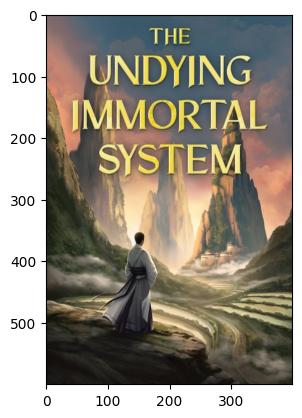

In [5]:
img_url = fic_soup.find('img', class_='thumbnail')['src']
img_data = requests.get(img_url).content 
f = open('./covers/cover_img.jpg', 'wb')
f.write(img_data)
f.close()

img = plt.imread('./covers/cover_img.jpg')
plt.imshow(img)

In [6]:
book = xml2epub.Epub(ficTitle, language='en')
## create your own book cover
coverChapter = xml2epub.create_chapter_from_string('./covers/cover_img.jpg', local=True, title='Cover', strict=False)
book.add_chapter(coverChapter)

In [7]:
def getNextChapter(soup) :
    nextBtn = soup.find('div', class_='col-md-offset-4').a
    nextUrl = urlBase + nextBtn["href"]

    # Faz a requisição HTTP para a página
    response = requests.get(nextUrl)

    # Verifica se a requisição foi bem-sucedida (status code 200)
    if response.status_code == 200:
        # Cria o objeto BeautifulSoup para fazer o parsing do HTML
        soup = BeautifulSoup(response.text, 'html.parser')
    else:
        print("Falha ao acessar a página:", response.status_code)
        
    return soup

In [8]:
numChapters = int(input('Number of chapters that you want in this book: '))

In [9]:
for i in range(1, numChapters+1):
    warning = soup.find('div', class_='chapter-content').div
    print(warning.text)
    warning.decompose()
    
    chapterTitle = str(soup.h1)
    chapterText = str(soup.find('div', class_='chapter-content'))
    chapterText = chapterTitle + chapterText

    print (f"{i} - Found: {soup.h1.text} ----- Adding Chapter...")
    ## create chapter
    chapterTitle = soup.h1.text
    ficChapter = xml2epub.create_chapter_from_string(chapterText, url=url, title=chapterTitle, strict=False)
    book.add_chapter(ficChapter)

    time.sleep(0.6)
    try:
        soup = getNextChapter(soup)
    except:
        print("There is no next chapter")
        break

Unauthorized use: this story is on Amazon without permission from the author. Report any sightings.
1 - Found: Chapter 1 – Life 1, Age 26 ----- Adding Chapter...
This story is posted elsewhere by the author. Help them out by reading the authentic version.
2 - Found: Chapter 2 – Life 4, Age 16, Martial Disciple 1 ----- Adding Chapter...
This story has been unlawfully obtained without the author's consent. Report any appearances on Amazon.
3 - Found: Chapter 3 – Life 4, Age 16, Martial Disciple 1 ----- Adding Chapter...
This content has been unlawfully taken from Royal Road; report any instances of this story if found elsewhere.
4 - Found: Chapter 4 – Life 4, Age 16, Martial Disciple 1 ----- Adding Chapter...
The story has been taken without consent; if you see it on Amazon, report the incident.
5 - Found: Chapter 5 – Life 10, Age 16, Martial Disciple 1 ----- Adding Chapter...
The genuine version of this novel can be found on another site. Support the author by reading it there.
6 - Foun

In [10]:
## create ebook
book.create_epub('./books/')

'./books/The Undying Immortal System.epub'